In [23]:
import numpy as np

%matplotlib inline

In [32]:
data = np.loadtxt("data.csv", delimiter = "," )

In [33]:
data.shape,data.size

((382, 2), 764)

In [34]:
x = data[:,0].reshape(-1,1)   
y = data[:,1].reshape(-1,1)

x.shape,y.shape

((382, 1), (382, 1))

In [35]:
from sklearn import model_selection

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size = 0.2)

X_train.shape,X_test.shape, Y_train.shape , Y_test.shape

((305, 1), (77, 1), (305, 1), (77, 1))

In [36]:
def fit(x_train,y_train):
    num = (x_train*y_train).mean() - x_train.mean()*y_train.mean()
    den = (x_train**2).mean() - x_train.mean()**2
    m = num/den
    
    c = y_train.mean() - m*x_train.mean()
    
    return m,c

In [46]:
def predict(x,m,c):
    return m*x +c

def score(y_true, y_pred):
    
    u = ((y_true - y_pred)**2).sum()
    v = ((y_true - y_true.mean())**2).sum()
    
    return 1-u/v
    
    
def cost(x,y,m,c):
    
    return ((y - m*x -c)**2).mean()

In [47]:
m,c = fit(X_train, Y_train)

#on test data
y_test_pred = predict(X_test,m,c)
print("Test Score:",score(Y_test,y_test_pred))


#on train data
y_train_pred = predict(X_train,m,c)
print("Train Score:", score(Y_train,y_train_pred))
print("M,C", m,c)
print("Cost on Training Data", cost(X_train, Y_train, m ,c))


Test Score: -0.04725975125038073
Train Score: 3.0344831506545766e-05
M,C 0.007739908571343167 91.87266407393757
Cost on Training Data 258.14084741203914


### Verifying the result from Sklearn Linear Regression Module

In [41]:
from sklearn.linear_model import LinearRegression

alg1 = LinearRegression()
alg1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
alg1.coef_,alg1.intercept_

(array([[0.00773991]]), array([91.87266407]))

In [45]:
score_test = alg1.score(X_test, Y_test)

score_train = alg1.score(X_train, Y_train)

score_test, score_train

(-0.047259751250379844, 3.0344831506323725e-05)

#### Checking the fit on Test Data

(1000, 1) (1000, 1)


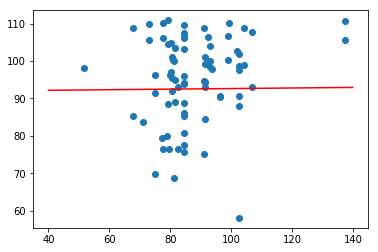

In [40]:
import matplotlib.pyplot as plt


x_line = np.arange(40,140,0.1).reshape(-1,1)
y_line = m*x_line +c
# print(x_line)


print(x_line.shape,y_line.shape)
plt.plot(x_line,y_line,"r")
plt.scatter(X_test, Y_test)
plt.show()